Importing the Dependencies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  

Importing the Bike Price Dataset

In [2]:
bike = pd.read_csv('/content/Bike Data.csv')

In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8295 entries, 0 to 8294
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            8295 non-null   object 
 1   Price            8295 non-null   int64  
 2   Year             8295 non-null   int64  
 3   Transmission     8295 non-null   object 
 4   Capacity         8295 non-null   float64
 5   Mileage          8295 non-null   int64  
 6   Published_Date   8295 non-null   object 
 7   USD_Rate         8295 non-null   float64
 8   Fuel_Price       8295 non-null   int64  
 9   Crude_Oil_Price  8295 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 648.2+ KB


In [4]:
bike['Brand'].value_counts()

Honda Dio                 1402
Bajaj CT-100               470
Bajaj Pulsar 150           380
Hero Pleasure              326
TVS Wego                   285
                          ... 
Honda CD 125 BENLY           1
Honda DIO Dx                 1
Hero Maestro EDGE            1
Bajaj pulsar 135             1
TVS NTORQ Race Edition       1
Name: Brand, Length: 169, dtype: int64

In [5]:
bike['Transmission'].value_counts()

Automatic     6618
Automatic      988
Manual         689
Name: Transmission, dtype: int64

In [6]:
bike.drop_duplicates()

,Brand,Price,Year,Transmission,Capacity,Mileage,Published_Date,USD_Rate,Fuel_Price,Crude_Oil_Price
0,Bajaj CT-100,160000,2010,Manual,100.0,47000,11/4/2021,201.49,157,15403.9100
1,Bajaj CT-100,160000,2012,Manual,100.0,60000,11/3/2021,201.45,157,15400.8500
2,Bajaj CT-100,160000,2012,Manual,100.0,45000,11/1/2021,201.98,157,15441.3700
3,Bajaj CT-100,160000,2009,Manual,100.0,109000,10/22/2021,201.39,157,15811.1300
4,Bajaj CT-100,160000,2012,Manual,100.0,21000,10/20/2021,200.54,157,15744.4000
...,...,...,...,...,...,...,...,...,...,...
8284,Yamaha Fz Version 2,230000,2018,Automatic,150.0,50500,3/21/2022,280.03,254,29982.8121
8285,Yamaha Fz Version 2,695000,2017,Automatic,150.0,30000,2/18/2022,202.51,177,18106.4191
8286,Yamaha Fz Version 2,775000,2019,Automatic,150.0,23450,1/5/2022,202.06,177,16231.4798
8287,Yamaha Fz Version 2,640000,2017,Automatic,150.0,51500,1/10/2022,202.84,177,16294.1372


In [7]:
bike

,Brand,Price,Year,Transmission,Capacity,Mileage,Published_Date,USD_Rate,Fuel_Price,Crude_Oil_Price
0,Bajaj CT-100,160000,2010,Manual,100.0,47000,11/4/2021,201.49,157,15403.9100
1,Bajaj CT-100,160000,2012,Manual,100.0,60000,11/3/2021,201.45,157,15400.8500
2,Bajaj CT-100,160000,2012,Manual,100.0,45000,11/1/2021,201.98,157,15441.3700
3,Bajaj CT-100,160000,2009,Manual,100.0,109000,10/22/2021,201.39,157,15811.1300
4,Bajaj CT-100,160000,2012,Manual,100.0,21000,10/20/2021,200.54,157,15744.4000
...,...,...,...,...,...,...,...,...,...,...
8290,Yamaha Fz Version 2,770000,2019,Automatic,150.0,24000,1/5/2022,202.06,177,16231.4798
8291,Yamaha Fz Version 2,775000,2019,Automatic,150.0,30100,1/10/2022,202.84,177,16294.1372
8292,Yamaha Fz Version 2,660000,2019,Automatic,150.0,21456,6/14/2022,349.20,420,39728.4840
8293,Yamaha Fz Version 2,710000,2018,Automatic,150.0,30159,6/24/2022,360.14,420,40973.1278


In [8]:
#convert Categories to numerical variable
bike['Brand'] = pd.factorize(bike.Brand)[0]
bike['Transmission'] = pd.factorize(bike.Transmission)[0]

In [9]:
bike['Brand'].value_counts()

76     1402
0       470
24      380
50      326
124     285
       ... 
69        1
80        1
49        1
20        1
118       1
Name: Brand, Length: 169, dtype: int64

In [10]:
bike['Transmission'].value_counts()

1    6618
2     988
0     689
Name: Transmission, dtype: int64

In [11]:
#check the number of rows and columns in the data frame
bike.shape

(8295, 10)

In [12]:
#check for missing values
bike.isnull().sum()

Brand              0
Price              0
Year               0
Transmission       0
Capacity           0
Mileage            0
Published_Date     0
USD_Rate           0
Fuel_Price         0
Crude_Oil_Price    0
dtype: int64

In [13]:
#statistical measures of the dataset
bike.describe()

,Brand,Price,Year,Transmission,Capacity,Mileage,USD_Rate,Fuel_Price,Crude_Oil_Price
count,8295.000000,8.295000e+03,8295.000000,8295.000000,8295.000000,8.295000e+03,8295.000000,8295.000000,8295.000000
mean,73.215552,3.600119e+05,2015.389271,1.036046,128.744184,3.527300e+04,210.887208,172.131525,16910.996532
std,48.464683,1.597921e+05,4.502900,0.448213,28.193407,3.259395e+04,36.045902,52.467703,5565.219752
min,0.000000,2.000000e+04,1968.000000,0.000000,50.000000,5.000000e+01,199.360000,157.000000,13773.780000
25%,26.000000,2.380000e+05,2014.000000,1.000000,110.000000,1.985600e+04,199.890000,157.000000,15403.910000
50%,76.000000,3.350000e+05,2017.000000,1.000000,125.000000,3.000000e+04,201.390000,157.000000,15706.710000
75%,115.000000,4.350000e+05,2018.000000,1.000000,150.000000,4.500000e+04,201.980000,157.000000,15853.520000
max,168.000000,1.650000e+06,2022.000000,2.000000,250.000000,1.600000e+06,366.720000,470.000000,40973.127800


In [14]:
Correlation = bike.corr()

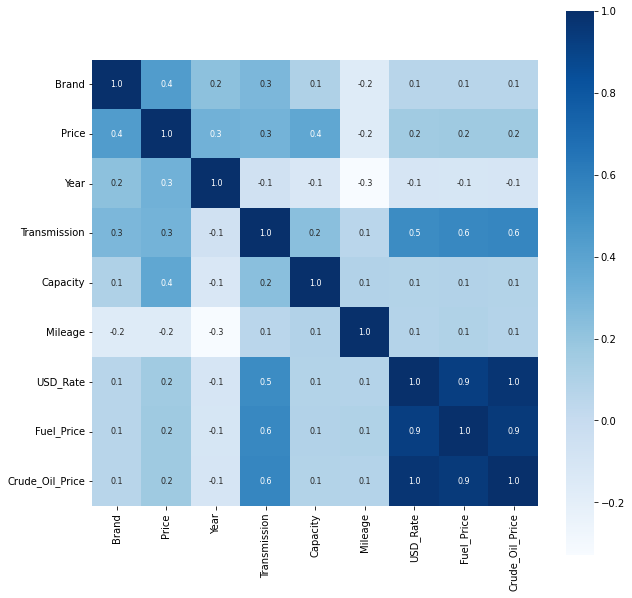

In [15]:
#construting a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(Correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

spliting the data and target

In [16]:
X = bike.drop(['Price','Published_Date'],axis=1) #features
Y = bike['Price'] #label or target

In [17]:
print(X)
print(Y)

      Brand  Year  Transmission  Capacity  Mileage  USD_Rate  Fuel_Price  \
0         0  2010             0     100.0    47000    201.49         157   
1         0  2012             0     100.0    60000    201.45         157   
2         0  2012             0     100.0    45000    201.98         157   
3         0  2009             0     100.0   109000    201.39         157   
4         0  2012             0     100.0    21000    200.54         157   
...     ...   ...           ...       ...      ...       ...         ...   
8290    129  2019             2     150.0    24000    202.06         177   
8291    129  2019             2     150.0    30100    202.84         177   
8292    129  2019             2     150.0    21456    349.20         420   
8293    129  2018             2     150.0    30159    360.14         420   
8294    129  2018             2     150.0    31000    354.96         338   

      Crude_Oil_Price  
0          15403.9100  
1          15400.8500  
2          1544

 Spliting the data into Training data and Test data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(8295, 8) (6636, 8) (1659, 8)


Model Training:
Random Forest Regressor

In [20]:
#Loading the model
regressor = RandomForestRegressor(n_estimators=100)

In [21]:
#Training the model with X_train
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [22]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [23]:
print(test_data_prediction)

[362200. 565700. 230310. ... 374450. 279030. 180110.]


In [24]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.7438899451246326


Compare the Actual Values and Predicted Values in a Plot

In [25]:
Y_test = list(Y_test)

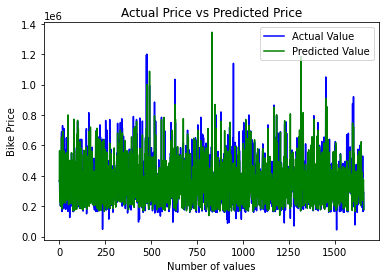

In [26]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Bike Price')
plt.legend()
plt.show()

In [27]:
import pickle

In [29]:
pickle.dump(regressor, open('/content/Random.pkl', 'wb'))